### SGD(Stochastic Gradient Descent) Classification & Regression

#### Gradient Descent

- Gradient Descent is an optimization algorithm used to find the values of parameters (coefficients) of a function that minimizes a cost function(objective function).

- In machine learning, we use mainly gradient descent to update the parameters of our model. Parameters may for instance refer to coefficients in Linear Regression and weights in neural networks and so on.

##### How Gradient Descent works?

 In simple steps:
 ![Credits: Simplilearn](https://www.simplilearn.com/ice9/free_resources_article_thumb/gradient-descent-learning-graph-machine-learning.JPG)

- Step 1: Initialize the parameters or coefficients with some random values and calculate the value of the cost function

- Step 2: Calculate the slope of the cost function with respect to each parameter.In other words, compute the gradient function of the cost function. Our concern here is to find change in cost function when the parameters are changed by a very small value from their original randomly initialized value.

- Step 3: Update the gradient function by plugging in the parameter values

- Step 4: Adjust the parameters with the gradients to reach the optimal values where cost finction is minimized
                - Calculate the step sizes for each parameters [step size = gradient * learning rate]
                - Use the new parameters[new params = old params -step size] for prediction and to calculate the new cost function value

- Step 5: Repeat steps 3 and 4 until gradient is almost 0 or till the further adjustments to weights don’t significantly reduce the Error


##### Note on Learning rate:

The learning rate mentioned above is a flexible parameter which heavily influences the convergence of the algorithm.
- Larger learning rates makes the algorithm take huge steps down the slope and it might jump across the minimum point thereby missing it.
- Smaller learning rates makes the algorithm converge to minimum point but very slowly 
![Credits:Simplilearn](https://www.simplilearn.com/ice9/free_resources_article_thumb/gradient-learning-rate-machine-learning.JPG)


From above steps Gradient Descent algorithm usually finds a local minimum of a differentiable function(cost function)by taking steps proportional to the negative of the gradient of the function at the current point.



#### Stochastic Gradient Descent


- Gradient descent can be slow to run on very large datasets.Because one iteration of the gradient descent algorithm requires a prediction for each instance in the training dataset, it can take a long time when you have many millions of instances.Suppose, you have a million samples in your dataset, so if you use a typical Gradient Descent optimization technique, you will have to use all of the one million samples for completing one iteration while performing the Gradient Descent, and it has to be done for every iteration until the minima is reached

- In situations when you have large amounts of data, you can use a variation of gradient descent called stochastic gradient descent(SGD).

- In this variation, the gradient descent procedure described above is run but the update to the coefficients or parameters is performed for each training instance, rather than at the end of the batch of instances. SGD uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

- Stochastic Gradient Descent replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data).Especially in big data applications this reduces the computational burden, achieving faster iterations in trade for a slightly lower convergence rate


##### How SGD works?
###### In brief steps:
Consider the problem of minimizing an objective function(Cost function or loss function) that has the form of a sum: 
![from wikipedia](https://wikimedia.org/api/rest_v1/media/math/render/svg/7f38e0bdfea090cfd651222e7db9806dce6164cd)

where,
![from wikipedia](https://wikimedia.org/api/rest_v1/media/math/render/svg/25b1170e62c103ff59c79ea424f1c409c4742225) gives the value of the loss function at i-th observation in the data set(used for training)


Stochastic gradient works simply by following steps:

- Step1: First of all let us choose 
    - The initial vector of parameters:
     ![wiki](https://wikimedia.org/api/rest_v1/media/math/render/svg/88b1e0c8e1be5ebe69d18a8010676fa42d7961e6)

    - Learning rate:
    ![wiki](https://wikimedia.org/api/rest_v1/media/math/render/svg/e4d701857cf5fbec133eebaf94deadf722537f64)

- Step2: Randomly shuffle examples in the training set

- Step3: Update or adjust the parameters as follows

    - For every suffled examples in training sets i=1,2,...,n adjust the each parameter as
     ![wiki](https://wikimedia.org/api/rest_v1/media/math/render/svg/4dec506d9a4c822ef0a4519d823ccd80ad8b79bc)
    
- Step4: Repeat Step 2 to 3 until an approximate minimum is obtained 






Stochastic gradient descent method of optimization that can be used to train models such as linear support vector machines (SVMs) and logistic regression models. Recently SGD has been applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing.






### Implementation of Stochastic Gradient Descent(SGD) Classifier

### Implementation using libraries
Libraries Doc Links:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

https://scikit-learn.org/stable/modules/sgd.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.ListedColormap.html

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html

https://matplotlib.org/3.1.1/api/colors_api.htm


[[66  2]
 [ 9 23]]


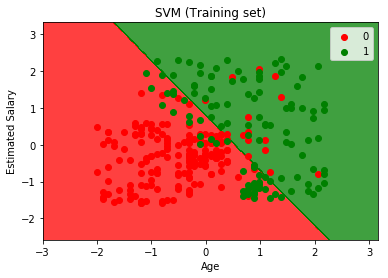

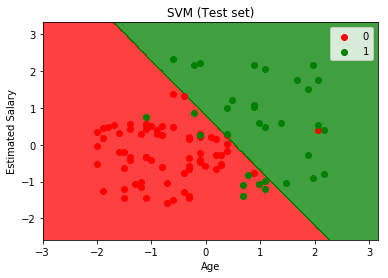

In [4]:
# SGD Classifier implementation

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SGD Classifier to the Training set
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = col.to_rgba_array(ListedColormap(('red', 'green'))(i)), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = col.to_rgba_array(ListedColormap(('red', 'green'))(i)), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


Coefficients:
 [-30.86141302]

Intercept:
 [34.6503913]

Score:
 0.4011289864161517

RMSE:
 7.411


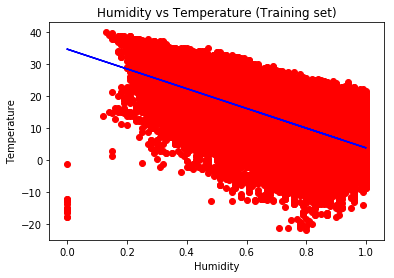

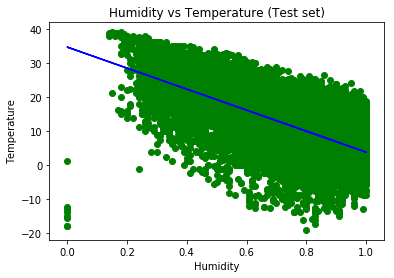

In [9]:

# Simple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/martandsingh/datasets/master/weatherHistory.csv')
dataset.describe()
dataset.head()
X = dataset.iloc[:, [5]].values
y= dataset.iloc[:,3].values


# Splitting the dataset into the Training set and Test set
from sklearn import metrics
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss='squared_loss')
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

#x Coefficient
print("\nCoefficients:\n",regressor.coef_)

#intercept
print("\nIntercept:\n",regressor.intercept_)

#Score
print("\nScore:\n",regressor.score(X_train, y_train))


#RMSE(Root Mean Square Error)
rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'.3f'))
print("\nRMSE:\n",rmse)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Humidity vs Temperature (Training set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Humidity vs Temperature (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()



